## Задание: вытащить все вакансии СБЕРа с HH (у апи есть ограничение в 2000, подумайте как его обойти)
### Вытащите все полные описания этих вакансий по запросу с https://api.hh.ru/vacancies/43326020 где 43326020 id вакансии
### Создайте аналогичный vacancy DataFrame только добавьте поле skills
### Переведите даты публикаций в datetime
### Постройте график опубликованных вакансий по датам
### Переведите даты в дни недели, и определите день недели, в который больше всего публикуют вакансий
### Найдите те вакансии с использованием python, которые вам интересны
### Определите по полю skills какие навыки больше всего востребованы для этих вакансий, и постройте график наиболее востребованных вакансий

In [1]:
import requests
import numpy as np
import pandas as pd
from tqdm.auto import tqdm
from collections import defaultdict
import datetime as dt
#from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
sber = '3529'
page = 1
num_per_page = 100
moscow = 1
url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={page}&per_page={num_per_page}&area={moscow}'
#https://hh.ru/search/vacancy?text=%D0%A0%D0%B0%D0%B7%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D1%87%D0%B8%D0%BA&area=1&salary=&currency_code=RUR&experience=between1And3&employment=full&schedule=fullDay&order_by=relevance&search_period=7&items_on_page=50&no_magic=true&L_save_area=true&from=suggest_post

In [4]:
# Собираем словарь с id вакансий со всех страниц
res = requests.get(url)
vacancies = res.json()
num_pages = vacancies.get('pages')
vacancy_ids = [el.get('id') for el in vacancies.get('items')]
num_pages

20

In [93]:
# Словарь с id вакансий
#vacancy_ids

In [30]:
#vacancies.get('items')

In [97]:
#res.json()

In [5]:
# проходим циклом по списку из них вытаскиваем id каждой вакансии и добавляем эти id в список "all_vacancy_ids"
all_vacancy_ids = []
for i in tqdm(range(vacancies.get('pages'))):
    url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={i}&per_page={num_per_page}&area={moscow}'
    res = requests.get(url)
    vacancies = res.json()
    vacancy_ids = [el.get('id') for el in vacancies.get('items')]
    all_vacancy_ids.extend(vacancy_ids)

In [110]:
#all_vacancy_ids

In [5]:
len(all_vacancy_ids)

2000

In [9]:
vacancies.keys()

dict_keys(['items', 'found', 'pages', 'per_page', 'page', 'clusters', 'arguments', 'alternate_url'])

In [6]:
vacancies_items = vacancies.get('items')

In [7]:
# Формируем словарь со списками для колонок таблицы
tab_dict = defaultdict(list)
# Заполняем списки с помощью цикла
for vacancies_items in tqdm(vacancies_items):
    tab_dict['id'].append(vacancies_items['id'])
    tab_dict['vacancy'].append(vacancies_items['name'])
    tab_dict['aepartment'].append(vacancies_items['department']['name'])
    tab_dict['area'].append(vacancies_items['area']['name'])
    tab_dict['schedule'].append(vacancies_items['schedule']['name'])
    tab_dict['published'].append(vacancies_items['published_at'])
    tab_dict['created'].append(vacancies_items['created_at'])
    tab_dict['skills'].append(vacancies_items['snippet']['requirement'])
    tab_dict['responsibility'].append(vacancies_items['snippet']['responsibility'])

df_vac = pd.DataFrame.from_dict(tab_dict)    

# Переведите даты публикаций в datetime

In [9]:
df_vac.published = pd.to_datetime(df_vac.published)
df_vac.created = pd.to_datetime(df_vac.created)
df_vac['published_dt'] = df_vac['published'].dt.strftime('%Y-%m-%d')
df_vac.published_dt = pd.to_datetime(df_vac.published_dt)
df_vac['weekday_1'] = df_vac['published'].dt.strftime('%w')
#df_vac['weekday_2'] = df_vac['published'].dt.strftime('%a')
#df_vac['weekday_3'] = df_vac['published'].dt.weekday
df_vac.head(2)

,id,vacancy,aepartment,area,schedule,published,created,skills,responsibility,published_dt,weekday_1
0,49245771,Java-разработчик (Heavy Metrics ),Сбер для экспертов,Москва,Полный день,2021-10-29 12:32:43+03:00,2021-10-29 12:32:43+03:00,Хорошее знание Core Java особенностей 1.7 и вы...,"Разработка сервисов, реализуемых на базе произ...",2021-10-29,5
1,46990229,Старший администратор АС/ Архитектор (SberBPM....,Сбер. IT,Москва,Полный день,2021-10-29 09:13:43+03:00,2021-10-29 09:13:43+03:00,Знание сетевой модели OSI. Опыт администрирова...,Проработка архитектуры автоматизированной сист...,2021-10-29,5


In [10]:
df_vac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype                                
---  ------          --------------  -----                                
 0   id              100 non-null    object                               
 1   vacancy         100 non-null    object                               
 2   aepartment      100 non-null    object                               
 3   area            100 non-null    object                               
 4   schedule        100 non-null    object                               
 5   published       100 non-null    datetime64[ns, pytz.FixedOffset(180)]
 6   created         100 non-null    datetime64[ns, pytz.FixedOffset(180)]
 7   skills          100 non-null    object                               
 8   responsibility  95 non-null     object                               
 9   published_dt    100 non-null    datetime64[ns]                    

In [25]:
#df_vac.published = pd.to_datetime(df_vac.published).dt.date
#df_vac.created = pd.to_datetime(df_vac.created).dt.date

# Постройте график опубликованных вакансий по датам

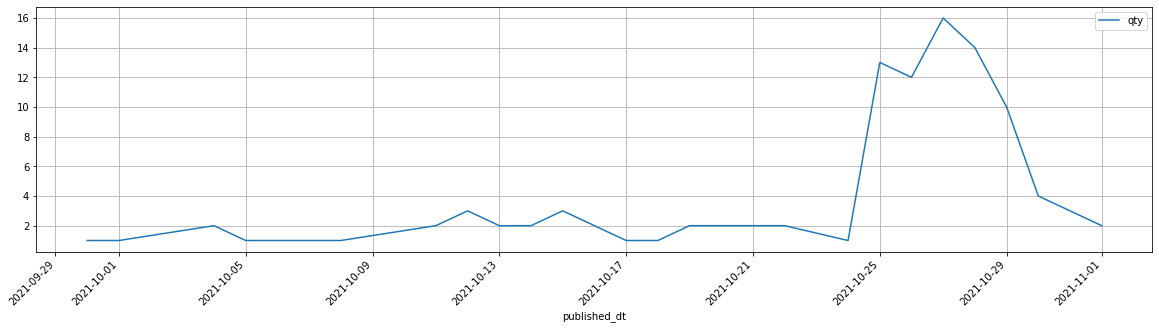

In [26]:
df_vac_1 = df_vac.groupby('published_dt', as_index = False)\
                    .agg({'id':'count'})\
                    .sort_values('id', ascending = False)\
                    .rename (columns = {'id' : 'qty'})\
                    .plot(x='published_dt', y='qty', rot=45, figsize=(20, 5), grid=True)
plt.show()

# Переведите даты в дни недели, и определите день недели, в который больше всего публикуют вакансий

In [27]:
df_vac_2 = df_vac.groupby('weekday_1', as_index = False)\
                    .agg({'id':'count'})\
                    .rename (columns = {'id' : 'qty'})\
                    .sort_values('qty', ascending=False)\
                    .head(1)
df_vac_2

,weekday_1,qty
3,3,21


# Найдите те вакансии с использованием python, которые вам интересны

In [28]:
df_vac_3 = df_vac.query('skills.str.lower().str.contains("python")\
                        & vacancy.str.lower().str.contains("data") \
                        ', engine = 'python')
df_vac_3[['vacancy','skills']]

,vacancy,skills
92,Senior Data Scientist/ML Engineer SberDevices,Уверенное владение Python на рабочем уровне. Х...


# Определите по полю skills какие навыки больше всего востребованы для этих вакансий, и постройте график наиболее востребованных вакансий

In [29]:
# Размечаем те вакансии, где присутствует skills "python" аналог конструкци case
df_vac_4 = df_vac
df_vac_4['clickhouse'] = np.where(df_vac_4['skills'].str.lower().str.contains('clickhouse', na=False), 1, 0)
df_vac_4['sql'] = np.where(df_vac_4['skills'].str.lower().str.contains('sql', na=False), 1, 0)
df_vac_4['java'] = np.where(df_vac_4['skills'].str.lower().str.contains('java', na=False), 1, 0)
df_vac_4['python'] = np.where(df_vac_4['skills'].str.lower().str.contains('python', na=False), 1, 0)
df_vac_4['perl'] = np.where(df_vac_4['skills'].str.lower().str.contains('perl', na=False), 1, 0)
df_vac_4['javascript'] = np.where(df_vac_4['skills'].str.lower().str.contains('javascript', na=False), 1, 0)
df_vac_4['c#'] = np.where(df_vac_4['skills'].str.lower().str.contains('C#', na=False), 1, 0)

In [30]:
df_vac_4.head(2)

,id,vacancy,aepartment,area,schedule,published,created,skills,responsibility,published_dt,weekday_1,clickhouse,sql,java,python,perl,javascript,c#
0,48972056,Лидер направления (создание корпоративной моде...,Сбер. IT,Москва,Полный день,2021-11-01 08:28:27+03:00,2021-11-01 08:28:27+03:00,"Опыт на проектах enterprise уровня, с большим ...",Формирование единой логической корпоративной м...,2021-11-01,1,0,0,0,0,0,0,0
1,47486008,Разработчик DWH (Управление сервисов корпорати...,Сбер для экспертов,Москва,Полный день,2021-10-27 16:47:10+03:00,2021-10-27 16:47:10+03:00,Опыт работы не менее 3 лет в сфере работы с да...,"Поддержка генерации и отбора идей, оценка труд...",2021-10-27,3,0,0,0,0,0,0,0


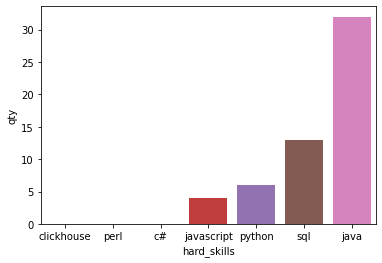

In [31]:
df_vac_5 = df_vac_4[['clickhouse','sql','java', 'python', 'perl', 'javascript', 'c#']].sum()
df_vac_5 = pd.DataFrame(df_vac_5, columns = ['qty'])
df_vac_5.index.name='hard_skills'
df_vac_5 = df_vac_5.reset_index().sort_values('qty', ascending=True)
#df_vac_5
sns.barplot(x='hard_skills', y='qty', data=df_vac_5)

# Наиболее востребованных вакансий

In [32]:
df_vac_6 = df_vac_4.query('skills.str.lower().str.contains("java")', engine = 'python')\
                    .groupby('vacancy', as_index=False)\
                    .agg({'id':'count'})\
                    .rename(columns = {'id':'qty'})\
                    .sort_values('qty', ascending=False)
df_vac_6

,vacancy,qty
7,Java разработчик,2
22,Senior Java разработчик,2
0,Android разработчик,1
16,Middle Java разработчик (Дистанционное Банковс...,1
28,Разработчик Java,1
27,Корпоративный архитектор по направлению SberUser,1
26,Ведущий инженер сопровождения,1
25,TeamLead Java (проект SberID),1
24,Senior android-разработчик (SberDevices - вирт...,1
23,Senior Java-разработчик (Team Lead),1
